Problem Statement
To classify Iris Flower into 3 species - Setosa, Versicolor and Verginica based on 4 parameters that are :
Sepal Length, Petal Length, Sepal Width, Petal Width 

Starting with basic data analysis and then we will proceed further to predictions using ML.

In [1]:
#Importing Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading Iris dataset from csv file 
iris = pd.read_csv("iris.csv")

In [3]:
#Printing dimensions of Iris Dataset 
print("shape of Iris Dataset: ",iris.shape)

shape of Iris Dataset:  (150, 5)


In [4]:
#Printing and Reviewing DataSet(Columns) 
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
#To view individual column counts,data type and check whether dataset is balanced or not. 
iris["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

<Axes: >

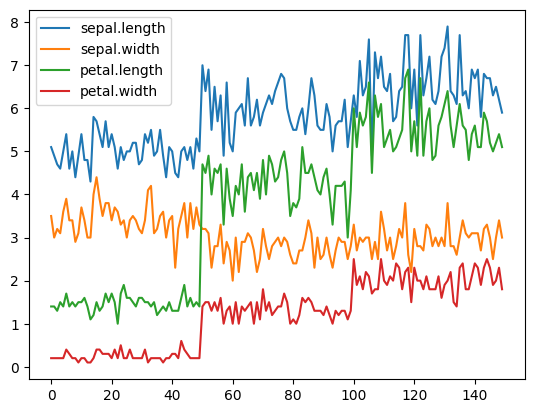

In [6]:
#As all the varieties have same number of enteries so it is a balanced dataset.
#Now we will analyse the data in 2D plot.
#First I am using just pyplot function plot to plot the graph
iris.plot() #default plt used is the line plot

Exploratory Data Analysis
An approach to analyse datasets to summarise their main characterstics, often done by visualisation methods.

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

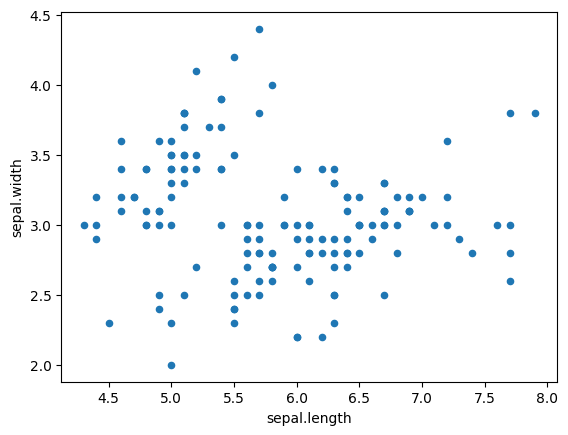

In [7]:
#Now we will plot the graph based on parameters on x axis and y axis
iris.plot(kind = "scatter",x="sepal.length",y="sepal.width")
#But we are not able to distinguish between variety or species#, we can also use Seaborn's joint plot for same purpose
#Now to differentiate the scatter points on the basis of variety we use Seaborn's facetgrid function

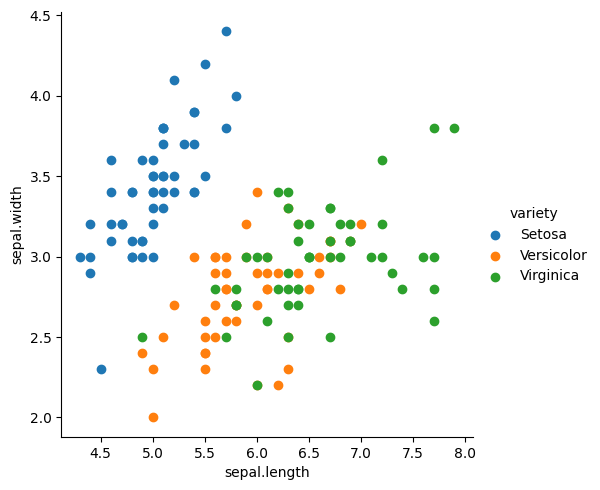

In [14]:
sns.FacetGrid(iris,hue="variety",height=5).map(plt.scatter,"sepal.length","sepal.width").add_legend()

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x00000203471E0290>>

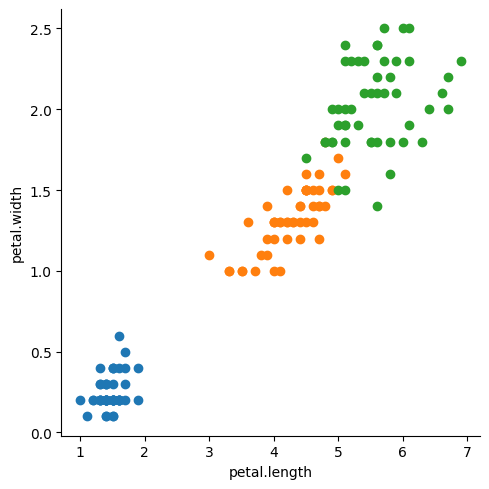

In [16]:
sns.FacetGrid(iris,hue="variety",height =5).map(plt.scatter,"petal.length","petal.width").add_legend 
#Now we can clearly observe that if we take petal length and petal width as parameters then we can get much better discrimination
#The setosa flowers can easily be distinguished from versicolor and virginica. However we can find some overlapping in other two.

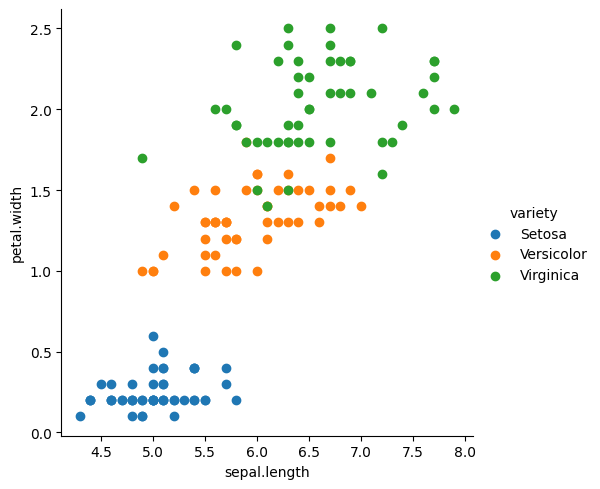

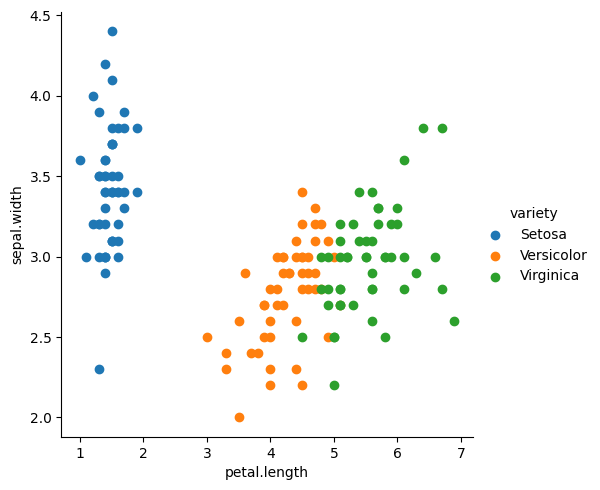

In [17]:
#Let's try on other two parameters. 
sns.FacetGrid(iris,hue="variety",height=5).map(plt.scatter,"sepal.length","petal.width").add_legend() 
sns.FacetGrid(iris,hue="variety",height=5).map(plt.scatter,"petal.length","sepal.width").add_legend()

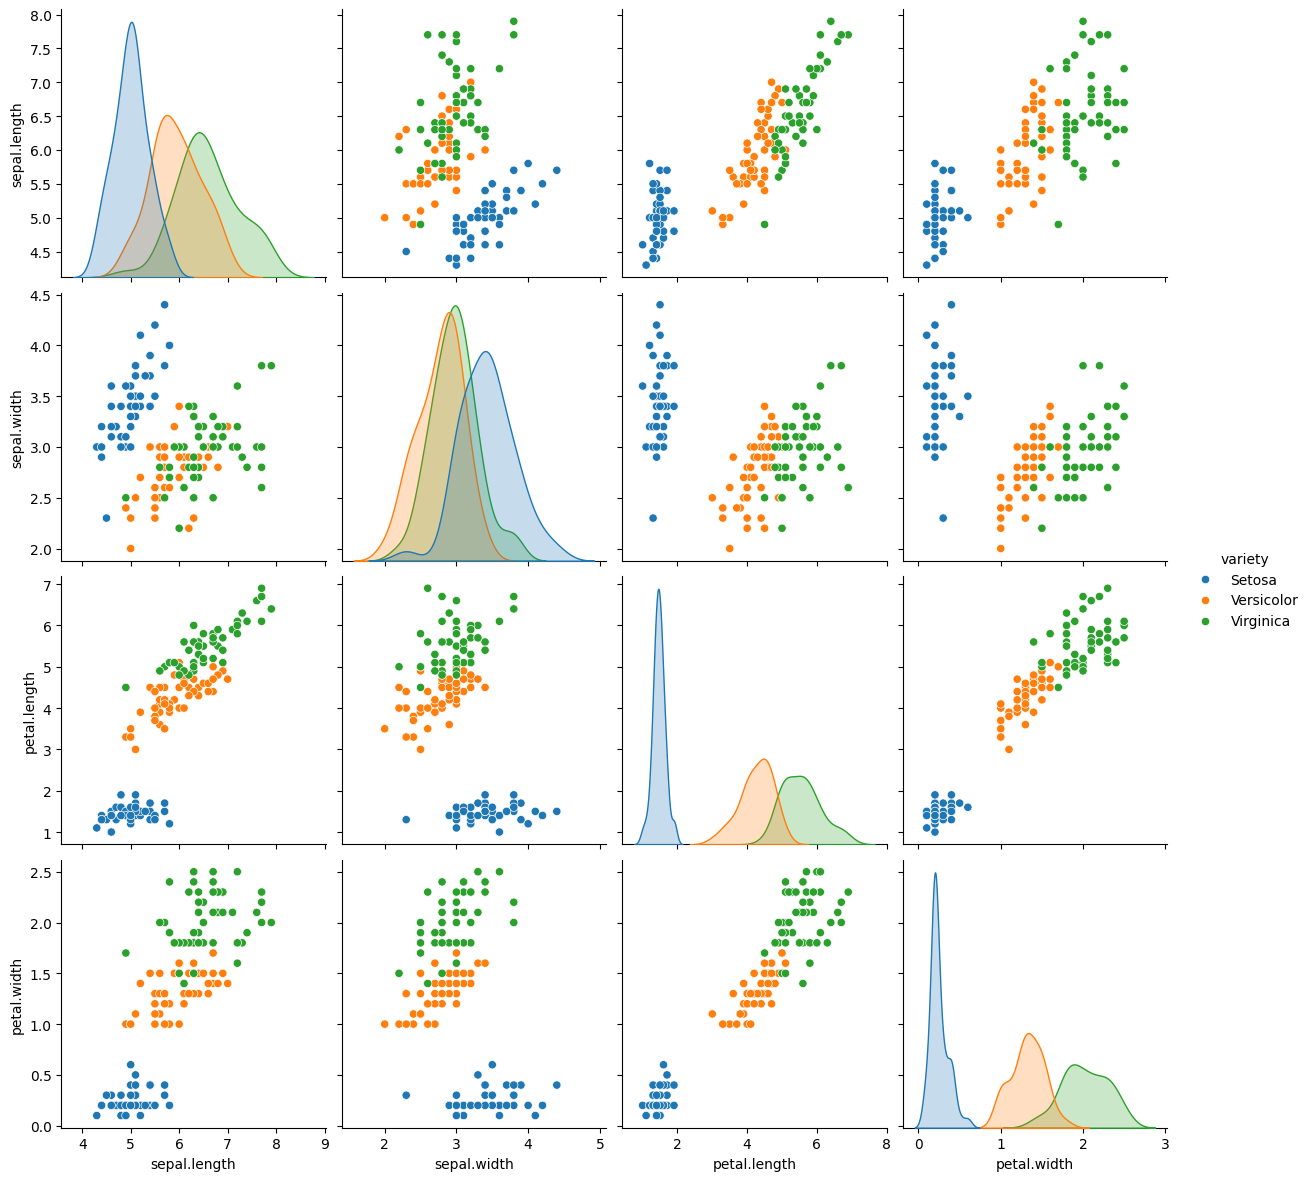

In [24]:
#We can do this directly by using pairplot. It gives us all possible combinations on x and y axis and the diagonal elements are 
#histogram by default but we can change them. 
sns.pairplot(iris,hue="variety",height=3) 
plt.show()  
#Now we can observe the elements above the diagonal and below are same only axis differs so we can consider either upper or lower
#diagonal elements. By using pair plot we can quickly determine which 2 factors will be best suited to differentiate we do not
#need individually check each as we have done earlier.


UNIVARIATE ANALYSIS

<Axes: ylabel='petal.length'>

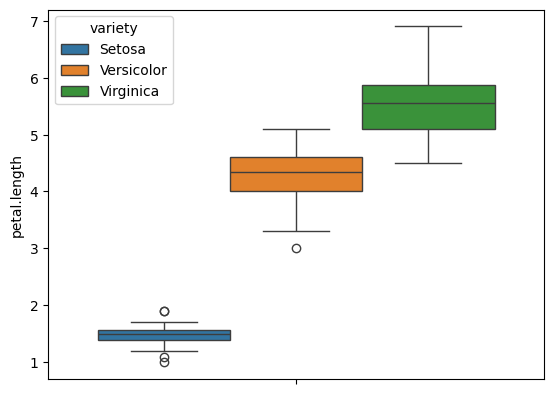

In [26]:

#Now as we have seen the max deviation variable we will further use that variable to distinguish categories.
#We will use petal.length
#Many univariate plots are available : 
sns.boxplot(y="petal.length",hue="variety",data=iris) 
#Lower line= 25 percentile, mid= 50 and upper 75 && horizontal lines represent max and min values
#From these box plots it is clear - petal.length (sertosa)<2, (versicolor)<5 & >2, (virginica >=5)
#We can draw whiskers for better understanding - In seaborn we use 1.5*IQR(width of box)

<Axes: ylabel='petal.length'>

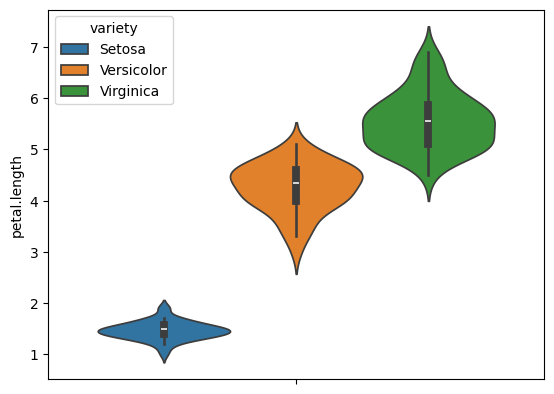

In [29]:
#For better understanding and spread we can use violinplot. It combines histogram and boxplot.
#The internal black area is box plot. It draws histograms/probab dist function in sideways.
sns.violinplot(y="petal.length",hue="variety",data=iris)

MULTIVARIATE ANALYSIS

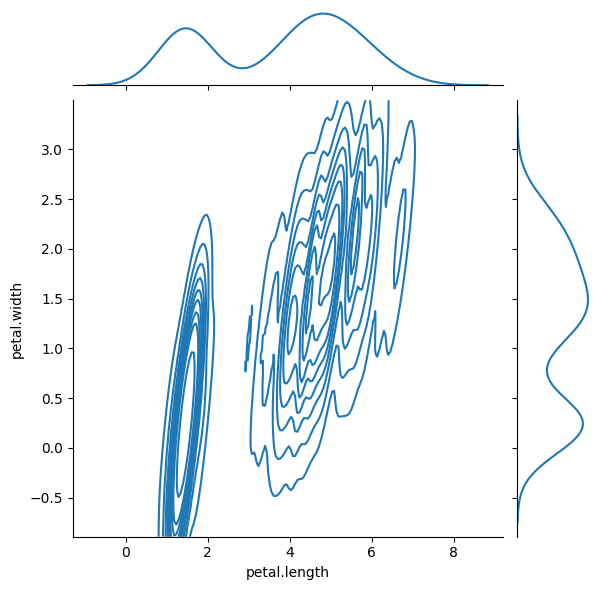

In [41]:
#When analysis is done on more than 2 parameters or variables.
#Now we will consider a variety i.e. Setosa and two variables like - petal.length and petal.width
#Now the denser region is at centre which makes hill like structure and height of hill is more where points are more.
#We will use colour variations called contours for the same.Darker(high density),Lighter(low density).
#Contour Density Plots(2D) types available are  [“scatter” | “reg” | “resid” | “kde” | “hex”]
sns.jointplot(x="petal.length",y="petal.width",data=iris,kind="kde")

In [42]:
#describe() function automatically gives us the mean,std,min and max of the dataset
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
iris.variety.describe()

count        150
unique         3
top       Setosa
freq          50
Name: variety, dtype: object

In [ ]:
#Now we are done with understanding the problem statement and visualising various parameters further we would have to predict
#any model which can give results.
#Calculating MEAN,VARIANCE AND STANDARD DEVIATION
#They corrupt easily just if there is one or two outliers.
#MEDIAN,QUANTILE AND PERCENTILE 

Now it is easily identified that the above problem is a type of CLASSIFICATION PROBLEM 

As we know from our EDA that the petal length is the best fit to classify the iris dataset but lets train the data on all te features and then compare the accuracy. 

So, lets apply different classification algorithms and predict results. 

Importing Libraries:

In [46]:
from sklearn.model_selection import train_test_split #Splitting data into training and testing set
from sklearn.linear_model import LogisticRegression   #For logistic regression algorithm
from sklearn.neighbors import KNeighborsClassifier    #For KNeighbors Classifier algorithm
from sklearn.tree import DecisionTreeClassifier       #For Decision Tree algorithm
from sklearn import metrics                           #For checking Model Accuracy
from sklearn import svm                               #For Support Vector Machine Algorithm

SPLITTING DATASET INTO TRAINING AND TEST DATASETS

In [47]:
train, test = train_test_split(iris, test_size = 0.3)   # This function splits our main dataset into train and test dataset.
# The attribute test_size=0.3 splits the data into train data =70% and test data =30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


Now, we will use 4 variables - 

train_X = Taking training data features, train_Y = Output/ Result of Training Data, test_X = Taking testing data features, test_Y = Output/ Result of Testing Data

In [48]:
train_X=train[['sepal.length','sepal.width','petal.length','petal.width']] # taking the training data features
train_Y=train.variety# output of our training data 
test_X= test[['sepal.length','sepal.width','petal.length','petal.width']]# taking test data features
test_Y =test.variety   #output value of test data

Now lets check our training and testing data

In [50]:
train_X.head()

,sepal.length,sepal.width,petal.length,petal.width
126,6.2,2.8,4.8,1.8
125,7.2,3.2,6.0,1.8
149,5.9,3.0,5.1,1.8
11,4.8,3.4,1.6,0.2
106,4.9,2.5,4.5,1.7


In [51]:
train_Y.head()

126    Virginica
125    Virginica
149    Virginica
11        Setosa
106    Virginica
Name: variety, dtype: object

In [52]:
test_X.head()

,sepal.length,sepal.width,petal.length,petal.width
94,5.6,2.7,4.2,1.3
7,5.0,3.4,1.5,0.2
129,7.2,3.0,5.8,1.6
24,4.8,3.4,1.9,0.2
89,5.5,2.5,4.0,1.3


In [53]:
test_Y.head()

94     Versicolor
7          Setosa
129     Virginica
24         Setosa
89     Versicolor
Name: variety, dtype: object

Now, we will check the accuracy for different models by using all the parameters. 



Support Vector Machine(SVM)

In [55]:
model = svm.SVC() 
model.fit(train_X,train_Y) 
prediction = model.predict(test_X) 
print("The accuracy of the SVM is ", metrics.accuracy_score(prediction,test_Y))

The accuracy of the SVM is  0.9777777777777777


SVM has given good accuracy of 97.77%

Now we will follow the same steps for training various ML algorithms and check their accuracy

Logistic Regression

In [60]:
model = LogisticRegression() 
model.fit(train_X,train_Y) 
prediction = model.predict(test_X) 
print("The accuracy of the Logistic Regression is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is  0.9777777777777777


Decision Tree

In [61]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y) 
prediction = model.predict(test_X) 
print("The accuracy of the Decision Tree is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is  0.9555555555555556



K-Nearest Neighbours

In [63]:
model = KNeighborsClassifier(n_neighbors = 3)  #Examines 3 neighbours 
model.fit(train_X,train_Y) 
prediction = model.predict(test_X) 
print("The accuracy of the KNN is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of the KNN is  0.9777777777777777



Now let's Train on model on Petals

In [64]:
petal = iris[['petal.width','petal.length','variety']]

In [65]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)   #petals 
train_x_p=train_p[['petal.width','petal.length']] 
train_y_p=train_p.variety 
test_x_p=test_p[['petal.width','petal.length']] 
test_y_p=test_p.variety

SVM

In [66]:
model=svm.SVC() 
model.fit(train_x_p,train_y_p)  
prediction = model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the SVM using Petals is: 0.9777777777777777


Logistic Regression

In [67]:
model = LogisticRegression() 
model.fit(train_x_p,train_y_p) 
prediction= model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777


Decision Tree

In [68]:
model=DecisionTreeClassifier() 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556


K-Nearest Neighbor

In [69]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

The accuracy of the KNN using Petals is: 0.9777777777777777


OBSERVATIONS
K- Neighbor Classifier gives best accuracy on Iris Dataset as Compared to other datasets.
Using petal length and petal width gives us more accuracy.
If we have used sepal length and sepal width accuracy would have been less.

Wuhoo!! We have completed the data analysis on IRIS Dataset as well implemented basic classification Machine Learning Algorithms.